<a href="https://colab.research.google.com/github/CNIU1997/BA_888/blob/master/BA888_Model_Kiki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## upload files and import library
from google.colab import files
#uploaded = files.upload()

import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

**Import Dataset**

In [0]:
y_train = pd.read_csv('y_train.csv',index_col= 0)
y_test = pd.read_csv('y_test.csv',index_col= 0)

X_train = pd.read_csv('train_20.csv',index_col= 0)
X_test = pd.read_csv('test_20.csv',index_col= 0)

In [0]:
print(y_train['Class'].value_counts(normalize=True))
print(y_test['Class'].value_counts(normalize=True))

1.0    0.548414
0.0    0.451586
Name: Class, dtype: float64
1.0    0.560136
0.0    0.439864
Name: Class, dtype: float64


In [0]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (17660, 20)
Training Labels Shape: (17660, 1)
Testing Features Shape: (4415, 20)
Testing Labels Shape: (4415, 1)


In [0]:
# merge together
X = pd.concat([X_train, X_test])
y = pd.concat([y_train, y_test])

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # calculate mean and standard deviation of train set
scaler.fit(X_train)


scaler2 = StandardScaler() # calculate mean and standard deviation of test set
scaler2.fit(X_test)


X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler2.transform(X_test) 

###**Models with Selected Features**

Using First 20 important features to predict, originally we have 222 variables, now we have 20 variables.

In [0]:
# selected_features = features.sort_values(ascending=False)[:20].index
# X_train = X_train[selected_features]
# X_test = X_test[selected_features]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # calculate mean and standard deviation of train set
scaler.fit(X_train)

scaler2 = StandardScaler() # calculate mean and standard deviation of test set
scaler2.fit(X_test)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler2.transform(X_test) 

In [0]:
# X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=0.80, random_state=42)

In [0]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler() # calculate mean and standard deviation of train set
# scaler.fit(X_train_cv)

# scaler2 = StandardScaler() # calculate mean and standard deviation of test set
# scaler2.fit(X_test_cv)

# X_train_scaled_cv = scaler.transform(X_train_cv) 
# X_test_scaled_cv = scaler2.transform(X_train_cv) 

**Cross Validatoin**

In [0]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction

In [0]:

kfold = KFold(n_splits=5) # k=5, split the data into 5 equal parts
xyz=[]
accuracy=[]
std=[]
# classifiers=['Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']

# models=[svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=5),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
# for i in models:
#     model = i
#     cv_result = cross_val_score(model,X,y, cv = kfold,scoring = "accuracy")
#     cv_result=cv_result
#     xyz.append(cv_result.mean())
#     std.append(cv_result.std())
#     accuracy.append(cv_result)
# new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
# new_models_dataframe2

####**SVM**

In [0]:
from sklearn import svm
classifier = svm.SVC(gamma='auto', random_state=0,) 
classifier.fit(X_train_scaled, y_train["Class"].ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
# from sklearn.model_selection import GridSearchCV
# param_grid = {'C': [0.1,1, 10], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf']}
# grid = GridSearchCV(svm.SVC(),param_grid,refit=True,verbose=2)
# grid.fit(X_train_scaled,y_train)

In [0]:
# print(grid.best_score_)
# print(grid.best_estimator_)

In [0]:
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# grid_predictions = grid.predict(X_test_cv)
# print(confusion_matrix(y_test,grid_predictions))
# print(classification_report(y_test_cv,grid_predictions))

In [0]:
from sklearn.metrics import accuracy_score
y_pred_svm = classifier.predict(X_test_scaled)

print('{:.2%}\n'.format(accuracy_score(y_test, y_pred_svm)))
print(confusion_matrix(y_test,y_pred_svm))
print(classification_report(y_test,y_pred_svm))

60.14%

[[ 654 1288]
 [ 472 2001]]
              precision    recall  f1-score   support

         0.0       0.58      0.34      0.43      1942
         1.0       0.61      0.81      0.69      2473

    accuracy                           0.60      4415
   macro avg       0.59      0.57      0.56      4415
weighted avg       0.60      0.60      0.58      4415



In [0]:
from sklearn.model_selection import cross_val_score

scores_svm = cross_val_score(estimator = classifier,X = X, y = y["Class"].ravel(),cv = kfold,scoring = "accuracy")
print("1.The Mean of the cross validation scores is:",scores_svm.mean())
print("2. The Standard Deviation of the scores is:",scores_svm.std())

xyz.append(scores_svm.mean())
std.append(scores_svm.std())
accuracy.append(scores_svm)

1.The Mean of the cross validation scores is: 0.5485843714609286
2. The Standard Deviation of the scores is: 0.010507282903504592


####**KNN**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


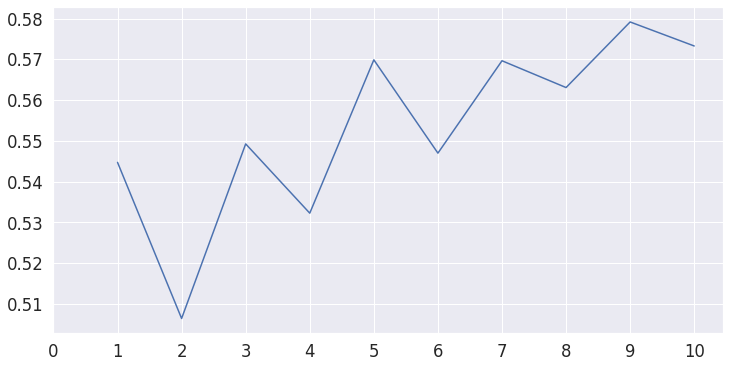

Accuracies for different values of n are: [0.54473386 0.50645527 0.54926387 0.53227633 0.56987542 0.54699887
 0.56964892 0.56308041 0.57916195 0.57327293] with the max value as  0.5791619479048697


In [0]:
from sklearn.neighbors import KNeighborsClassifier
a_index=list(range(1,11))
a=pd.Series()
x=[0,1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    knn=KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train_scaled,y_train["Class"].ravel())
    prediction=knn.predict(X_test_scaled)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,y_test["Class"].ravel())))
plt.plot(a_index, a)
plt.xticks(x)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()
print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
# Train the model using the training sets
knn.fit(X_train_scaled,y_train["Class"].ravel())
# Predict output 
y_pred_knn = knn.predict(X_test_scaled)

In [0]:
from sklearn import metrics
print(f"Accuracy:",metrics.accuracy_score(y_test, y_pred_knn)*100,"%")

Accuracy: 57.916194790486976 %


In [0]:
from sklearn.model_selection import cross_val_score
scores_knn = cross_val_score(estimator = knn,X = X, y = y['Class'].ravel(),cv = kfold,scoring = "accuracy")
print("1.The Mean of the scores is:",scores_knn.mean())
print("2. The Standard Deviation of the scores is:",scores_knn.std())

xyz.append(scores_knn.mean())
std.append(scores_knn.std())
accuracy.append(scores_knn)

1.The Mean of the scores is: 0.5551981879954699
2. The Standard Deviation of the scores is: 0.0032268183589595767


####**Naive Bayes classifier**

In [0]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train_scaled, y_train["Class"].ravel()).predict(X_test_scaled)
print(metrics.classification_report(y_test["Class"].ravel(), y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.54      0.42      0.48      1942
         1.0       0.61      0.72      0.66      2473

    accuracy                           0.59      4415
   macro avg       0.58      0.57      0.57      4415
weighted avg       0.58      0.59      0.58      4415



In [0]:
# evaluate accuracy
acc = accuracy_score(y_test, y_pred_gnb) * 100
acc

58.822197055492644

In [0]:
from sklearn.model_selection import cross_val_score

scores_gnb = cross_val_score(estimator = gnb,X = X, y = y["Class"].ravel(),cv = kfold,scoring = "accuracy")
print("1.The Mean of the cross validation scores is:",scores_gnb.mean())
print("2. The Standard Deviation of the scores is:",scores_gnb.std())

xyz.append(scores_gnb.mean())
std.append(scores_gnb.std())
accuracy.append(scores_gnb)

1.The Mean of the cross validation scores is: 0.5063193657984145
2. The Standard Deviation of the scores is: 0.006117360570562089


####**Random Forest classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rft =RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
rft.fit(X_train,y_train)

y_pred_rft =rft.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
feature_imp = pd.Series(rft.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp


Weighted_Average_Shs_Out           0.059397
Retained_earnings_(deficit)        0.056703
EPS                                0.056662
Earnings_Yield                     0.056289
Financing_Cash_Flow                0.055244
Net_cash_flow_/_Change_in_cash     0.053817
Operating_Cash_Flow_per_Share      0.051995
Operating_Cash_Flow_growth         0.050782
Net_Income_per_Share               0.048908
Book_Value_per_Share_Growth        0.048783
Weighted_Average_Shares_Growth     0.048687
EPS_Growth                         0.048303
Operating_Income_Growth            0.047684
SG&A_Expenses_Growth               0.047465
Issuance_(buybacks)_of_shares      0.046789
Gross_Profit_Growth                0.046226
Receivables_growth                 0.046204
Asset_Growth                       0.045996
Revenue_Growth                     0.045470
Effect_of_forex_changes_on_cash    0.038594
dtype: float64

No handles with labels found to put in legend.


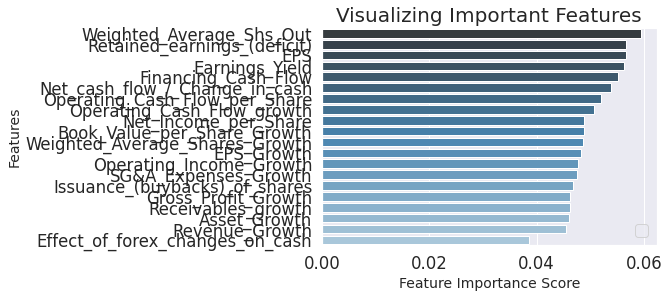

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index,palette="Blues_d")
sns.set(font_scale=1.5)
# Add labels 
plt.xlabel('Feature Importance Score',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title("Visualizing Important Features",fontsize=20)
plt.legend()
plt.show()

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rft))

Accuracy: 0.6013590033975085


In [0]:
from sklearn.model_selection import cross_val_score

scores_rft = cross_val_score(estimator = rft,X = X, y = y["Class"].ravel(),cv = kfold,scoring = "accuracy")
print("1.The Mean of the cross validation scores is:",scores_rft.mean())
print("2. The Standard Deviation of the scores is:",scores_rft.std())

xyz.append(scores_rft.mean())
std.append(scores_rft.std())
accuracy.append(scores_rft)

1.The Mean of the cross validation scores is: 0.6065232163080407
2. The Standard Deviation of the scores is: 0.008318956015313073


**Logistic Regression**

In [0]:
from sklearn.linear_model import LogisticRegression #logistic regression
model_log = LogisticRegression()
model_log.fit(X_train,y_train["Class"].ravel())
y_pred_log =model_log.predict(X_test)
print('The accuracy of the Logistic Regression is', metrics.accuracy_score(y_pred_log,y_test))

The accuracy of the Logistic Regression is 0.5805209513023782


In [0]:
from sklearn.model_selection import cross_val_score

scores_log = cross_val_score(estimator = model_log,X = X, y = y["Class"].ravel(),cv = kfold,scoring = "accuracy")
print("1.The Mean of the cross validation scores is:",scores_log.mean())
print("2. The Standard Deviation of the scores is:",scores_log.std())

xyz.append(scores_log.mean())
std.append(scores_log.std())
accuracy.append(scores_log)

1.The Mean of the cross validation scores is: 0.5764439411098528
2. The Standard Deviation of the scores is: 0.007934635214790051


**Decision Tree**

In [0]:
from sklearn.tree import DecisionTreeClassifier #Decision Tree
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
y_pred_tree =clf_tree.predict(X_test)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(y_pred_tree,y_test))

The accuracy of the Decision Tree is 0.5469988674971688


In [0]:
from sklearn.model_selection import cross_val_score

scores_tree = cross_val_score(estimator = clf_tree,X = X, y = y["Class"].ravel(),cv = kfold,scoring = "accuracy")
print("1.The Mean of the cross validation scores is:",scores_tree.mean())
print("2. The Standard Deviation of the scores is:",scores_tree.std())

xyz.append(scores_tree.mean())
std.append(scores_tree.std())
accuracy.append(scores_tree)

1.The Mean of the cross validation scores is: 0.5469535673839185
2. The Standard Deviation of the scores is: 0.0035478983917012546




---



##**Ensembling**

***Voting Classifier***

In [0]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('KNN',KNeighborsClassifier(n_neighbors=5)),
                                              ('Rft',RandomForestClassifier(n_estimators=100,random_state=0)),
                                              ('LR',LogisticRegression()),
                                              ('DT',DecisionTreeClassifier(random_state=0)),
                                              ('NB',GaussianNB()),
                                              ('SVM',svm.SVC(probability=True,kernel='rbf', gamma='auto', random_state=0))
                                             ], 
                       voting='soft').fit(X_train_scaled,y_train["Class"].ravel())
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test_scaled,y_test["Class"].ravel()))
cross= cross_val_score(ensemble_lin_rbf,X,y["Class"].ravel(), cv = 5,scoring = "accuracy")

print('The cross validated score is',cross.mean())
xyz.append(cross.mean())
std.append(cross.std())
accuracy.append(cross)

The accuracy for ensembled model is: 0.5970554926387316
The cross validated score is 0.5739977349943375


***Bagged KNN***

In [0]:
from sklearn.ensemble import BaggingClassifier
bagg_knn =BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=5),random_state=0,n_estimators=700)
bagg_knn.fit(X_train_scaled,y_train["Class"].ravel())
bgg_prediction=bagg_knn.predict(X_test_scaled)
print('The accuracy for bagged KNN is:',metrics.accuracy_score(bgg_prediction,y_test["Class"].ravel()))
bgg_knn_result=cross_val_score(bagg_knn,X,y["Class"].ravel(),cv=5,scoring='accuracy')
print('The cross validated score for bagged KNN is:',bgg_knn_result.mean())

xyz.append(bgg_knn_result.mean()) 
std.append(bgg_knn_result.std())
accuracy.append(bgg_knn_result)

The accuracy for bagged KNN is: 0.5768969422423557
The cross validated score for bagged KNN is: 0.5474065685164213


***AdaBoost(Adaptive Boosting)***

In [0]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100,random_state=0,learning_rate=0.1)
ada_result=cross_val_score(ada,X,y["Class"].ravel(),cv=5,scoring='accuracy')
print('The cross validated score for AdaBoost is:',ada_result.mean())

xyz.append(ada_result.mean()) 
std.append(ada_result.std())
accuracy.append(ada_result)

The cross validated score for AdaBoost is: 0.6037146092865233


In [0]:
#Train the model using the training
ada.fit(X_train,y_train["Class"].ravel())

y_pred_ada =rft.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada))

Accuracy: 0.6013590033975085


***Stochastic Gradient Boosting***

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
grad=GradientBoostingClassifier(n_estimators=500,random_state=0,learning_rate=0.1)
result=cross_val_score(grad,X,y["Class"].ravel(),cv=5,scoring='accuracy')
print('The cross validated score for Gradient Boosting is:',result.mean())

The cross validated score for Gradient Boosting is: 0.6112344280860702


In [0]:
#Train the model using the training
grad.fit(X_train,y_train["Class"].ravel())

y_pred_grad =rft.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_grad))

Accuracy: 0.6013590033975085


In [0]:
xyz.append(result.mean()) 
std.append(result.std())
accuracy.append(result)

***XGBoost***

In [0]:
import xgboost as xg
xgboost=xg.XGBClassifier(n_estimators=900,learning_rate=0.1)
xgboost_result=cross_val_score(xgboost,X,y["Class"].ravel(),cv=5,scoring='accuracy')
print('The cross validated score for XGBoost is:',xgboost_result.mean())

xyz.append(xgboost_result.mean())
std.append(xgboost_result.std())
accuracy.append(xgboost_result)

The cross validated score for XGBoost is: 0.6068403171007927


In [0]:
#Train the model using the training
xgboost.fit(X_train,y_train["Class"].ravel())

y_pred_xgb =rft.predict(X_test)

from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgb))

Accuracy: 0.6013590033975085


##**Model Selection**

**Cross Validation Table**

In [0]:
classifiers=['Radial SVM','KNN','Naive Bayes','Random Forest','Logistic Regression',
             'Decision Tree','Voting Classifier','Bagged KNN','AdaBoost(Adaptive Boosting)',
             'Stochastic Gradient Boosting','XGBoost']
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Radial SVM,0.548584,0.010507
KNN,0.555198,0.003227
Naive Bayes,0.506319,0.006117
Random Forest,0.606523,0.008319
Logistic Regression,0.576444,0.007935
Decision Tree,0.546954,0.003548
Voting Classifier,0.573998,0.004761
Bagged KNN,0.547407,0.003516
AdaBoost(Adaptive Boosting),0.603715,0.004175
Stochastic Gradient Boosting,0.611234,0.004907


**Cross Validation Plot**

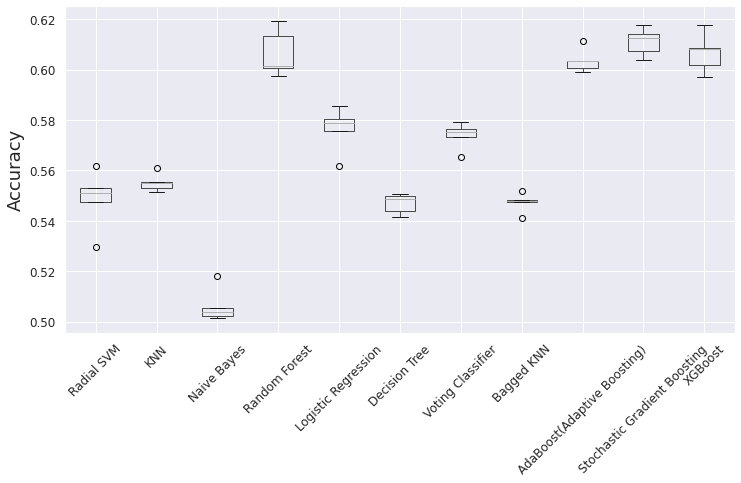

In [0]:
plt.subplots(figsize=(12,6))
box= pd.DataFrame(accuracy,index= classifiers).transpose()
box.boxplot(fontsize=12)
plt.xticks(rotation=45)
plt.ylabel('Accuracy')
# plt.savefig('model_accuracy.jpg',dpi=300,bbox_inches="tight")


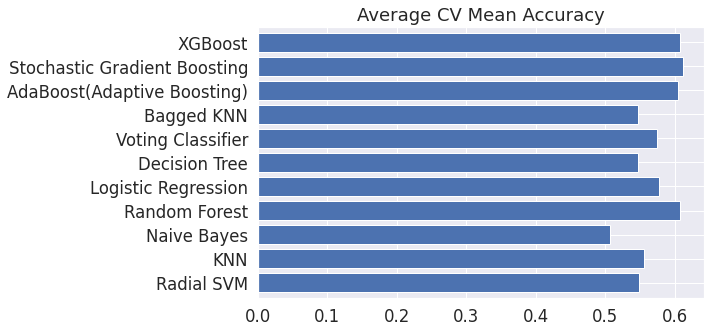

In [0]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
# plt.savefig('model_avg_CV_score.jpg',dpi=300,bbox_inches="tight")
plt.show()

####**ROC Curves**

In [0]:
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
pred_val_svm = classifier.decision_function(X_test)
pred_val_knn = knn.predict_proba(X_test)[:,1]
pred_val_gnb = gnb.predict_proba(X_test)[:,1]
pred_val_rft = rft.predict_proba(X_test)[:,1]
pred_val_tree = clf_tree.predict_proba(X_test)[:,1]
pred_val_ada = ada.predict_proba(X_test)[:,1]
pred_val_grad = grad.predict_proba(X_test)[:,1]
pred_val_xgb = xgboost.predict_proba(X_test)[:,1]
fpr[1], tpr[1], _ = roc_curve(y_test.values, pred_val_svm)
fpr[2], tpr[2], _ = roc_curve(y_test.values, pred_val_gnb)
fpr[3], tpr[3], _ = roc_curve(y_test.values, pred_val_knn)
fpr[4], tpr[4], _ = roc_curve(y_test.values, pred_val_rft)
fpr[5], tpr[5], _ = roc_curve(y_test.values, pred_val_log)
fpr[6], tpr[6], _ = roc_curve(y_test.values, pred_val_tree)
fpr[7], tpr[7], _ = roc_curve(y_test.values, pred_val_ada)
fpr[8], tpr[8], _ = roc_curve(y_test.values, pred_val_grad)
fpr[9], tpr[9], _ = roc_curve(y_test.values, pred_val_xgb)
roc_auc[1] = auc(fpr[1], tpr[1])
roc_auc[2] = auc(fpr[2], tpr[2])
roc_auc[3] = auc(fpr[3], tpr[3])
roc_auc[4] = auc(fpr[4], tpr[4])
roc_auc[5] = auc(fpr[5], tpr[5])
roc_auc[6] = auc(fpr[6], tpr[6])
roc_auc[7] = auc(fpr[7], tpr[7])
roc_auc[8] = auc(fpr[8], tpr[8])
roc_auc[9] = auc(fpr[9], tpr[9])
# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_test.values.ravel(), y_pred_svm.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

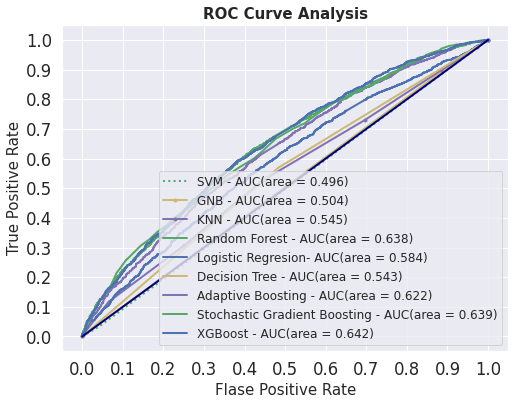

In [0]:
fig = plt.figure(figsize=(8,6))

lw = 2
plt.plot(fpr[1], tpr[1], 
         lw=lw, label='SVM - AUC(area = %0.3f)' % roc_auc[1], linestyle=':', color='g')

plt.plot(fpr[2], tpr[2], 
         lw=lw, label='GNB - AUC(area = %0.3f)' % roc_auc[2], marker='.',color='y')

plt.plot(fpr[3], tpr[3], 
         lw=lw, label='KNN - AUC(area = %0.3f)' % roc_auc[3], marker='.',color='m',)

plt.plot(fpr[4], tpr[4], 
         lw=lw, label='Random Forest - AUC(area = %0.3f)' % roc_auc[4], linestyle='-',color='g',)

plt.plot(fpr[5], tpr[5], 
         lw=lw, label='Logistic Regresion- AUC(area = %0.3f)' % roc_auc[5], linestyle='-',color='b',)

plt.plot(fpr[6], tpr[6], 
         lw=lw, label='Decision Tree - AUC(area = %0.3f)' % roc_auc[6], linestyle='-',color='y',)

plt.plot(fpr[7], tpr[7], 
         lw=lw, label='Adaptive Boosting - AUC(area = %0.3f)' % roc_auc[7], linestyle='-',color='m',)

plt.plot(fpr[8], tpr[8], 
         lw=lw, label='Stochastic Gradient Boosting - AUC(area = %0.3f)' % roc_auc[8], linestyle='-',color='g',)

plt.plot(fpr[9], tpr[9], 
         lw=lw, label='XGBoost - AUC(area = %0.3f)' % roc_auc[9], linestyle='-',color='b',)


plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')
# plt.savefig('model_ROC.jpg',dpi=300,bbox_inches="tight")
plt.show()

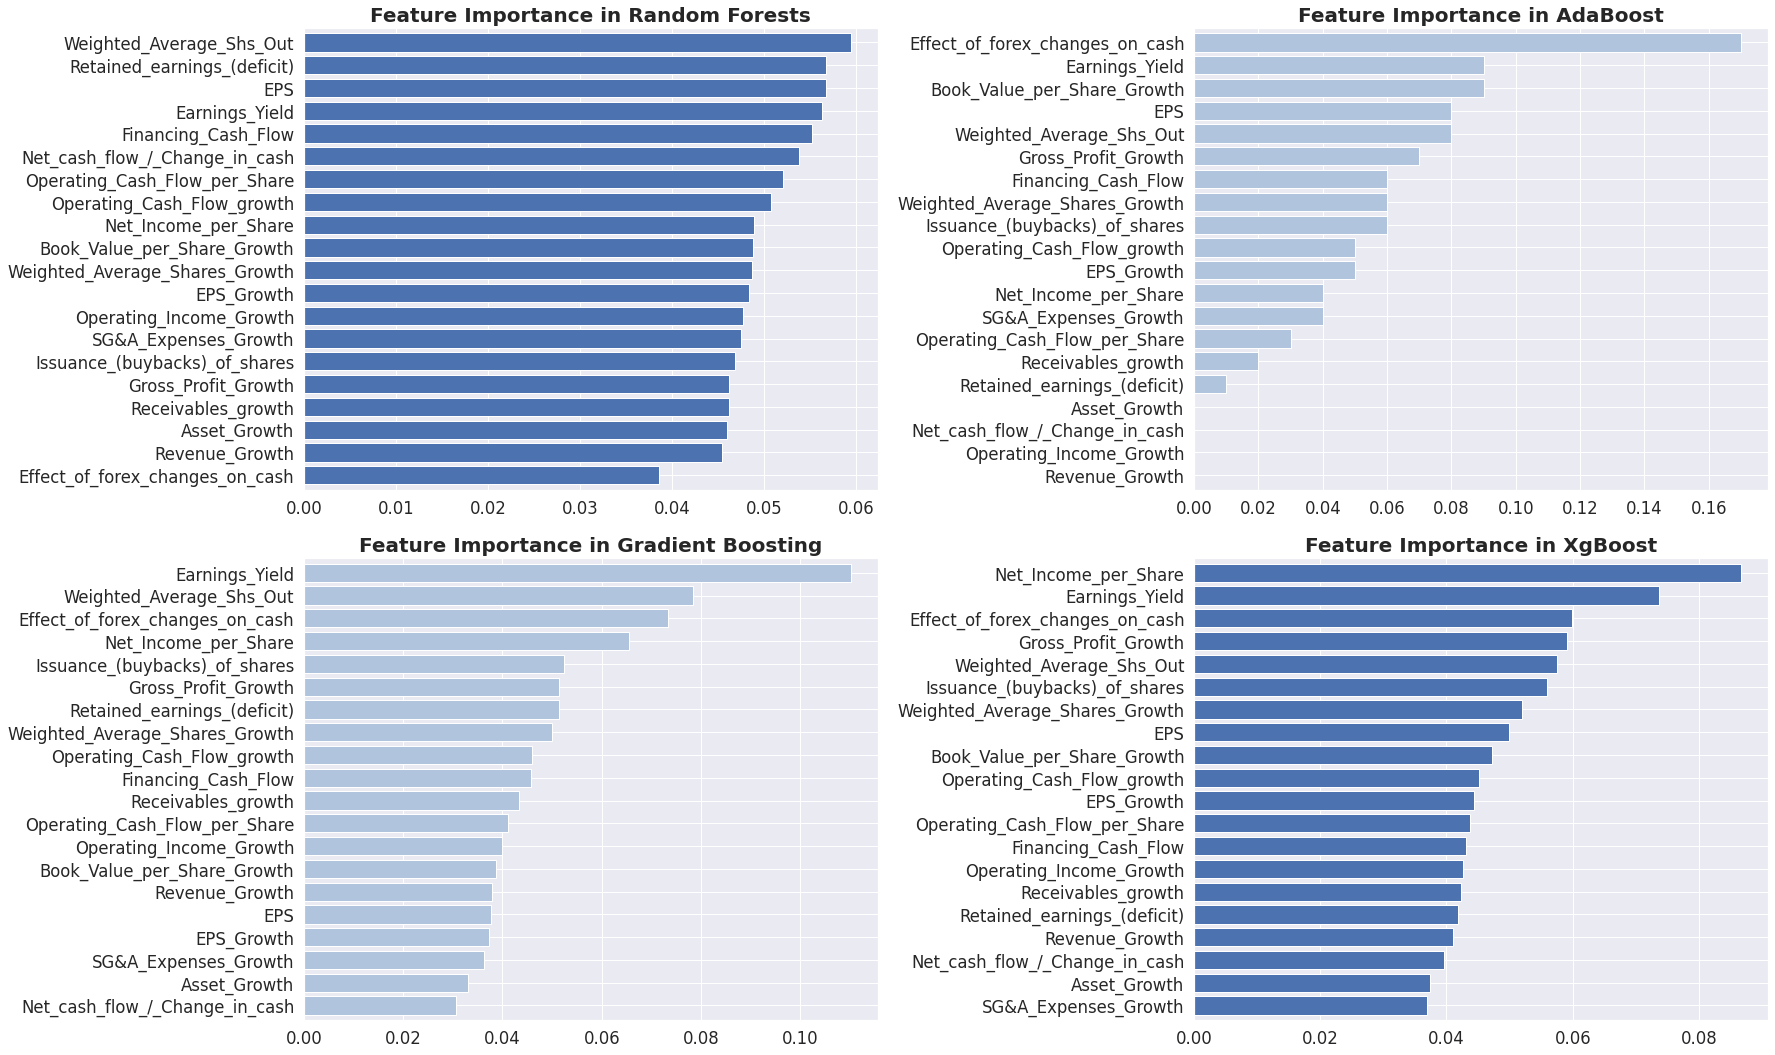

In [0]:
f,ax=plt.subplots(2,2,figsize=(25,15))

pd.Series(rft.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0])
ax[0,0].set_title('Feature Importance in Random Forests',fontweight="bold",fontsize=20)

pd.Series(ada.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='lightsteelblue')
ax[0,1].set_title('Feature Importance in AdaBoost',fontweight="bold",fontsize=20)

pd.Series(grad.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],color='lightsteelblue')
ax[1,0].set_title('Feature Importance in Gradient Boosting',fontweight="bold",fontsize=20)


pd.Series(xgboost.feature_importances_,X.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1])
ax[1,1].set_title('Feature Importance in XgBoost',fontweight="bold",fontsize=20)

plt.tight_layout()
# plt.savefig('model_FE_importance.jpg',dpi=300,bbox_inches="tight")
plt.show()

##**Hyperparameter Tuning**

***Hyper-Parameter Tuning for AdaBoost***


In [0]:
# from sklearn.model_selection import GridSearchCV
# n_estimators=list(range(100,1100,100))
# learn_rate=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
# hyper={'n_estimators':n_estimators,'learning_rate':learn_rate}
# gd=GridSearchCV(estimator=AdaBoostClassifier(),param_grid=hyper,verbose=True)
# gd.fit(X_train,y_train)
# print(gd.best_score_)
# print(gd.best_estimator_)

***Hyper-Parameter Tuning for Random Forest***

In [0]:
from sklearn.model_selection import GridSearchCV
n_estimators=range(100,1100,100)
hyper={'n_estimators':n_estimators}
gd=GridSearchCV(estimator=RandomForestClassifier(random_state=0),param_grid=hyper,verbose=True)
gd.fit(X_train,y_train['Class'].ravel())
y_pred_rft_T =rft.predict(X_test)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 20.5min finished


0.6133069082672706
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


***Hyper-Parameter Tuning for XGBoost***

set a timer ;)

In [0]:
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [0]:
# # A parameter grid for XGBoost
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# xgb = XGBClassifier(learning_rate=0.01, n_estimators=600, nthread=4)


In [0]:
# from datetime import datetime
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.metrics import roc_auc_score
# from sklearn.model_selection import StratifiedKFold
# from xgboost import XGBClassifier

# folds = 5
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 666)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3, random_state=1001 )

# # Here we go
# start_time = timer(None) # timing starts from this point for "start_time" variable
# random_search.fit(X_train, y_train)
# timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  25 out of  25 | elapsed:  3.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



 Time taken: 0 hours 4 minutes and 13.44 seconds.


In [0]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# # results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

In [0]:
# y_pred_xgbT = random_search.predict_proba(X_test)
# from sklearn import metrics
# # Model Accuracy, how often is the classifier correct?
# print("Accuracy:",metrics.accuracy_score(y_test, y_pred_xgbT))


GridSearchCV-----TAKE TO0 LONG :(

In [0]:
# grid = GridSearchCV(estimator=xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf.split(X,Y), verbose=3 )
# grid.fit(X, Y)
# print('\n All results:')
# print(grid.cv_results_)
# print('\n Best estimator:')
# print(grid.best_estimator_)
# print('\n Best score:')
# print(grid.best_score_ * 2 - 1)
# print('\n Best parameters:')
# print(grid.best_params_)
# results = pd.DataFrame(grid.cv_results_)
# results.to_csv('xgb-grid-search-results-01.csv', index=False)

# y_test = grid.best_estimator_.predict_proba(test)
# results_df = pd.DataFrame(data={'id':test_df['id'], 'target':y_test[:,1]})
# results_df.to_csv('submission-grid-search-xgb-porto-01.csv', index=False)

Best: -0.651217 using {'n_estimators': 200}
-0.651631 (0.003704) with: {'n_estimators': 100}
-0.651217 (0.004315) with: {'n_estimators': 200}
-0.652840 (0.005018) with: {'n_estimators': 300}
-0.655171 (0.005379) with: {'n_estimators': 400}
-0.657926 (0.005663) with: {'n_estimators': 500}
-0.660193 (0.006047) with: {'n_estimators': 600}
-0.662905 (0.006410) with: {'n_estimators': 700}
-0.665298 (0.006350) with: {'n_estimators': 800}
-0.667375 (0.006483) with: {'n_estimators': 900}


Text(0, 0.5, 'Log Loss')

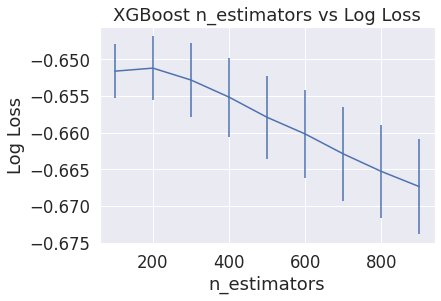

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
n_estimators = range(100, 1000, 100)
param_grid = dict(n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(xgb_model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_train, y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(n_estimators, means, yerr=stds)
plt.title("XGBoost n_estimators vs Log Loss")
plt.xlabel('n_estimators')
plt.ylabel('Log Loss')
# plt.savefig('n_estimators.jpg',dpi=300,bbox_inches="tight")

In [0]:
plt.savefig('n_estimators.jpg',dpi=300,bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

range(1, 11)
Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


Best: -0.649510 using {'max_depth': 4}
-0.661522 (0.003184) with: {'max_depth': 1}
-0.653867 (0.004387) with: {'max_depth': 2}
-0.650621 (0.005303) with: {'max_depth': 3}
-0.649510 (0.006230) with: {'max_depth': 4}
-0.651308 (0.006338) with: {'max_depth': 5}
-0.654252 (0.006140) with: {'max_depth': 6}
-0.658732 (0.007258) with: {'max_depth': 7}
-0.662193 (0.009064) with: {'max_depth': 8}
-0.667165 (0.010648) with: {'max_depth': 9}
-0.671996 (0.008970) with: {'max_depth': 10}


Text(0, 0.5, 'Log Loss')

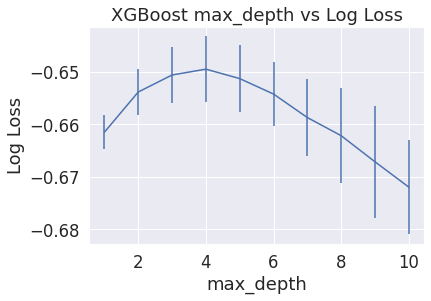

In [0]:
# grid search
model = XGBClassifier()
max_depth = range(1, 11, 1)
print(max_depth)
param_grid = dict(max_depth=max_depth)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# plot
plt.errorbar(max_depth, means, yerr=stds)
plt.title("XGBoost max_depth vs Log Loss")
plt.xlabel('max_depth')
plt.ylabel('Log Loss')
# plt.savefig('max_depth.png')

In [0]:
plt.savefig('max_depth.jpg',dpi=300,bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

In [0]:
# grid search
model = XGBClassifier()
learn_rate = [ 0.001, 0.01, 0.1, 0.2, 0.3]
print(learn_rate)
param_grid = dict(learn_rate=learn_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train.values.ravel())
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))
# # plot
# plt.errorbar(learn_rate, means, yerr=stds)
# plt.title("XGBoost learn_rate vs Log Loss")
# plt.xlabel('learn_rate')
# plt.ylabel('Log Loss')
# plt.savefig('learn_rate.png')

[0.001, 0.01, 0.1, 0.2, 0.3]
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.1min finished


Best: -0.650621 using {'learn_rate': 0.001}
-0.650621 (0.005303) with: {'learn_rate': 0.001}
-0.650621 (0.005303) with: {'learn_rate': 0.01}
-0.650621 (0.005303) with: {'learn_rate': 0.1}
-0.650621 (0.005303) with: {'learn_rate': 0.2}
-0.650621 (0.005303) with: {'learn_rate': 0.3}


In [0]:
%%time
xgb_final = XGBClassifier(max_depth=4,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.001)

xgb_final_2 = XGBClassifier(max_depth=4,
                        objective='binary:logistic',
                        n_estimators=200,
                        learning_rate = 0.001)

xgb_final.fit(X_train, y_train.values.ravel())

CPU times: user 4.85 s, sys: 13 ms, total: 4.86 s
Wall time: 4.86 s


In [0]:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_final_2.fit(X_train, y_train.values.ravel(), early_stopping_rounds=15, eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.389015	validation_0-logloss:0.693078	validation_1-error:0.400679	validation_1-logloss:0.693086
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.389015	validation_0-logloss:0.69301	validation_1-error:0.400679	validation_1-logloss:0.693025
[2]	validation_0-error:0.389015	validation_0-logloss:0.692941	validation_1-error:0.400679	validation_1-logloss:0.692963
[3]	validation_0-error:0.389015	validation_0-logloss:0.692873	validation_1-error:0.400679	validation_1-logloss:0.692902
[4]	validation_0-error:0.389015	validation_0-logloss:0.692805	validation_1-error:0.400679	validation_1-logloss:0.692841


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[5]	validation_0-error:0.389015	validation_0-logloss:0.692737	validation_1-error:0.400679	validation_1-logloss:0.692781
[6]	validation_0-error:0.389015	validation_0-logloss:0.692669	validation_1-error:0.400679	validation_1-logloss:0.69272
[7]	validation_0-error:0.389015	validation_0-logloss:0.692601	validation_1-error:0.400679	validation_1-logloss:0.692659
[8]	validation_0-error:0.389015	validation_0-logloss:0.692533	validation_1-error:0.400679	validation_1-logloss:0.692599
[9]	validation_0-error:0.389015	validation_0-logloss:0.692466	validation_1-error:0.400679	validation_1-logloss:0.692539
[10]	validation_0-error:0.389015	validation_0-logloss:0.692398	validation_1-error:0.400679	validation_1-logloss:0.692479
[11]	validation_0-error:0.389015	validation_0-logloss:0.692331	validation_1-error:0.400679	validation_1-logloss:0.692419
[12]	validation_0-error:0.389015	validation_0-logloss:0.692264	validation_1-error:0.400679	validation_1-logloss:0.692359
[13]	validation_0-error:0.389015	valid

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.001, max_delta_step=0, max_depth=4,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
# make predictions for test data
y_pred_xgb_final = xgb_final.predict(X_test)
predictions = [round(value) for value in y_pred_xgb_final]

In [0]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.4f%%" % (accuracy * 100.0))


Accuracy: 60.2039%


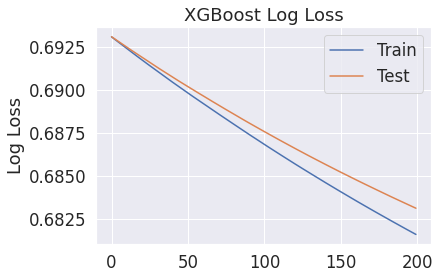

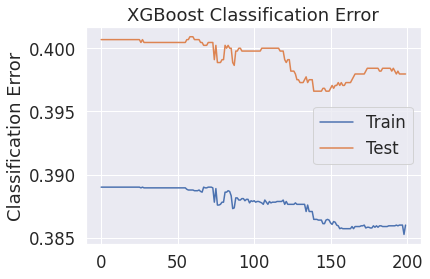

In [0]:
# retrieve performance metrics
results = xgb_final_2.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()


In [0]:
# Compute ROC curve and ROC area for each class
fprr = dict()
tprr = dict()
roc_auc2 = dict()

pred_val_rft_T = gd.predict_proba(X_test)[:,1]
pred_val_xgb_T = xgb_final.predict_proba(X_test)[:,1]

fprr[1], tprr[1], _ = roc_curve(y_test.values,pred_val_rft_T)
fprr[2], tprr[2], _ = roc_curve(y_test.values,pred_val_xgb_T)

roc_auc2[1] = auc(fprr[1], tprr[1])
roc_auc2[2] = auc(fprr[2], tprr[2])

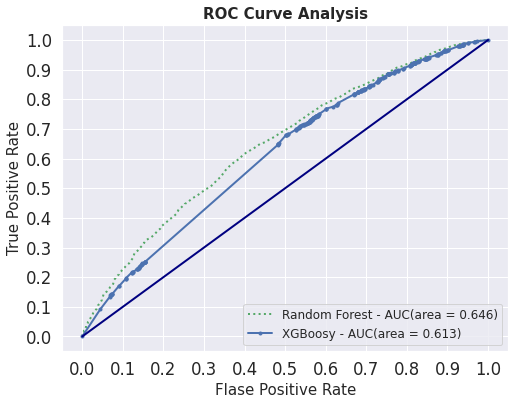

In [0]:
fig = plt.figure(figsize=(8,6))
lw = 2
plt.plot(fprr[1], tprr[1], 
         lw=lw, label='Random Forest - AUC(area = %0.3f)' % roc_auc2[1], linestyle=':', color='g')

plt.plot(fprr[2], tprr[2], 
         lw=lw, label='XGBoosy - AUC(area = %0.3f)' % roc_auc2[2], marker='.',color='b')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':12}, loc='lower right')
# plt.savefig('model_ROC_TWO_BEST.jpg',dpi=300,bbox_inches="tight")
plt.show()

In [0]:
#Create a Gaussian Classifier
rft_gd =RandomForestClassifier(n_estimators=300)

#Train the model using the training sets y_pred=clf.predict(X_test)
rft_gd.fit(X_train,y_train)

y_pred_rft_Tt = rft_gd.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


No handles with labels found to put in legend.


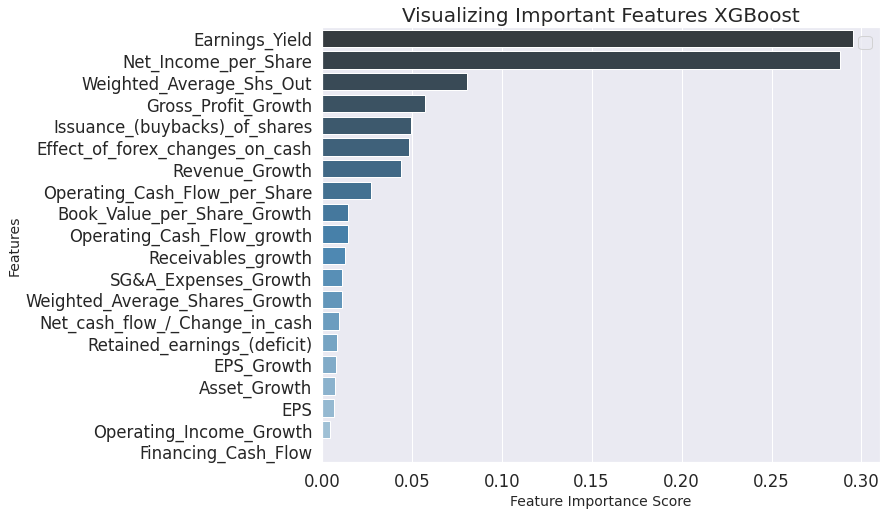

In [0]:
f,ax=plt.subplots(1,1,figsize=(10,8))

FEI_xgb = pd.Series(xgb_final.feature_importances_,X_test.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot(x=FEI_xgb, y=FEI_xgb.index,palette="Blues_d")
# Add labels 
plt.xlabel('Feature Importance Score',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title("Visualizing Important Features XGBoost",fontsize=20)
plt.legend()
# plt.savefig('Importance_XGB.jpg',dpi=300,bbox_inches="tight")
plt.show()

No handles with labels found to put in legend.


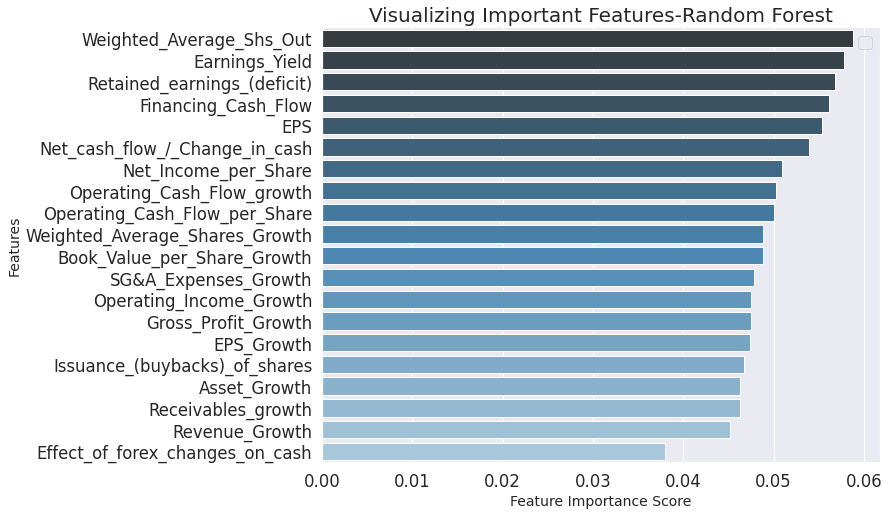

In [0]:
f,ax=plt.subplots(1,1,figsize=(10,8))

FEI_Rft = pd.Series(rft_gd.feature_importances_,X_test.columns).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=FEI_Rft, y=FEI_Rft.index,palette="Blues_d")
sns.set(font_scale=1.5)
# Add labels 
plt.xlabel('Feature Importance Score',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title("Visualizing Important Features-Random Forest",fontsize=20)
# plt.savefig('Importance_RFT.jpg',dpi=300,bbox_inches="tight")
plt.legend()


##**Models with Original Data**

In [359]:
train = pd.read_csv('train_data.csv',index_col=0)
test = pd.read_csv('test_data.csv',index_col=0)

## clean train
train = train[train.Sector != 'X1']
train = train[train.Sector != 'TRUE']
train = pd.get_dummies(train, columns=['Sector'])
test = pd.get_dummies(test, columns=['Sector'])
df = pd.concat([train, test], join="outer") 

df = df.iloc[:-2].drop(['X1','PRICE_VAR','year',"PB_ratio",
"PTB_ratio",
"priceToSalesRatio",
"PE_ratio",
"PFCF_ratio",
"POCF_ratio",
"ROE",
"payablesTurnover",
"inventoryTurnover",
"daysOfPayablesOutstanding",
"debtRatio",
"debtEquityRatio",
"interestCoverage",
"operatingCashFlowPerShare",
"freeCashFlowPerShare",
"cashPerShare",
"payoutRatio",
"Consolidated_Income",
"EPS_Diluted",
"Return_on_Tangible_Assets",
"ROIC",
"Days_of_Inventory_on_Hand",
"cashFlowCoverageRatios",
"EPS_Diluted_Growth",
"Weighted_Average_Shs_Out_(Dil)",
"Weighted_Average_Shares_Diluted_Growth"],axis=1)
cols = df.select_dtypes(exclude=['float']).columns
df[cols] = df[cols].apply(pd.to_numeric, downcast='float', errors='coerce')


for col in df: 
     df[col] = winsorize(df[col], limits=[0.05,0.05])


X_all = df.drop(['Class'],axis=1)
y_all = df['Class']

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.20, random_state=42)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,224,225,226) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, comp

###**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf_rrr =RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rrr.fit(X_train_all,y_train_all)

y_pred_rft =clf_rrr.predict(X_test_all)

In [366]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5080407701019253


####**Naive Bayes classifier**

In [363]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train_all, y_train_all).predict(X_test_all)
print(metrics.classification_report(y_test_all, y_pred_gnb))

              precision    recall  f1-score   support

         0.0       0.46      0.82      0.59      1942
         1.0       0.64      0.25      0.35      2473

    accuracy                           0.50      4415
   macro avg       0.55      0.53      0.47      4415
weighted avg       0.56      0.50      0.46      4415



In [364]:
# evaluate accuracy
acc = accuracy_score(y_test, y_pred_gnb) * 100
acc

49.96602491506229

In [368]:
scores_gnb = cross_val_score(estimator = gnb,X = X_all, y = y_all,cv = 5)
print("1.The Mean of the scores is:",scores_gnb.mean())
print("2. The Standard Deviation of the scores is:",scores_gnb.std())

1.The Mean of the scores is: 0.49553793884484715
2. The Standard Deviation of the scores is: 0.020312643520104805


In [371]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = knn,X = X_all, y = y_all,cv = 5)
print("1.The Mean of the scores is:",scores.mean())
print("2. The Standard Deviation of the scores is:",scores.std())

1.The Mean of the scores is: 0.4859343148357872
2. The Standard Deviation of the scores is: 0.03445984111013611


####**KNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
knn.fit(X_train_all,y_train_all)
# Predict output 
y_pred = knn.predict(X_test_all)

In [353]:
from sklearn import metrics
print(f"Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 50.80407701019253 %


In [0]:
# merge together
X = pd.concat([X_train_all, X_test_all])
Y = pd.concat([y_train_all, y_test_all])


---

**Below Section Were Outdated Version**


---

##**Models with Selected Features**

Using First 20 important features to predict, originally we have 222 variables, now we have 20 variables.

In [0]:
# selected_features_original = ['Revenue',
#                   'Gross_Profit',
#                   'Net_Income',
#                   'Net_Income_Com',
#                   'EPS_Diluted',
#                   'Weighted_Average_Shs_Out_(Dil)',
#                   'EBIT_Margin',
#                   'Profit_Margin',
#                   'Free_Cash_Flow_margin',
#                   'Consolidated_Income',
#                   'Net_Profit_Margin',
#                   'Cash_and_short-term_investments',
#                   'Total_non-current_assets',
#                   'Free_Cash_Flow',
#                   'priceEarningsToGrowthRatio',
#                   'ebitperRevenue',
#                   'niperEBT',
#                   'pretaxProfitMargin',
#                   'netProfitMargin',
#                   'returnOnAssets',
#                   'eBITperRevenue',
#                   'Return_on_Tangible_Assets',
#                   '3Y_Net_Income_Growth_(per_Share)',
#                   'Book_Value_per_Share_Growth']
selected_features_original = ['EPS_Diluted','Cash_and_short-term_investments','Book_Value_per_Share_Growth']
X_train = X_train[selected_features_original]
X_test = X_test[selected_features_original]

####**SVM**

In [0]:
from sklearn import svm
classifier = svm.SVC(gamma='auto', random_state=0) 
classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
from sklearn.metrics import accuracy_score
y_pred_svm = classifier.predict(X_test)

print('{:.2%}\n'.format(accuracy_score(y_test, y_pred)))

60.82%



####**KNN**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
# Train the model using the training sets
knn.fit(X_train,y_train)
# Predict output 
y_pred_knn = knn.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


In [0]:
from sklearn import metrics
print(f"Accuracy:",metrics.accuracy_score(y_test, y_pred)*100,"%")

Accuracy: 60.820045558086555 %


In [0]:
# merge together
X = pd.concat([X_train, X_test])
Y = pd.concat([y_train, y_test])

In [0]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator = knn,X = X, y = Y,cv = 5)
print("1.The Mean of the scores is:",scores.mean())
print("2. The Standard Deviation of the scores is:",scores.std())

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

1.The Mean of the scores is: 0.49082672706681774
2. The Standard Deviation of the scores is: 0.010475008397529772


####**Naive Bayes classifier**

In [0]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred_gnb = gnb.fit(X_train, y_train).predict(X_test)
print(metrics.classification_report(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       0.33      0.91      0.48      1345
           1       0.82      0.19      0.30      3045

    accuracy                           0.41      4390
   macro avg       0.58      0.55      0.39      4390
weighted avg       0.67      0.41      0.36      4390



/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# evaluate accuracy
acc = accuracy_score(y_test, y_pred_gnb) * 100
acc

40.72892938496583

In [0]:
scores_gnb = cross_val_score(estimator = gnb,X = X, y = Y,cv = 5)
print("1.The Mean of the scores is:",scores_gnb.mean())
print("2. The Standard Deviation of the scores is:",scores_gnb.std())

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = col

1.The Mean of the scores is: 0.45359003397508496
2. The Standard Deviation of the scores is: 0.006786858068865465


####**Random Forest classifier**

In [0]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred_rft =clf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [0]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [0]:
feature_imp = pd.Series(clf.feature_importances_,index=X_test.columns).sort_values(ascending=False)
feature_imp


Cash_and_short-term_investments    0.343204
EPS_Diluted                        0.328978
Book_Value_per_Share_Growth        0.327818
dtype: float64

No handles with labels found to put in legend.


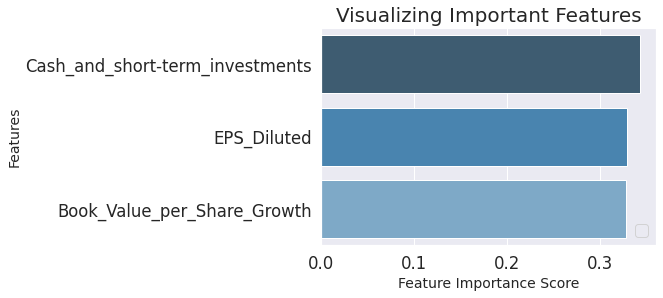

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index,palette="Blues_d")
sns.set(font_scale=1.5)
# Add labels 
plt.xlabel('Feature Importance Score',fontsize=14)
plt.ylabel('Features',fontsize=14)
plt.title("Visualizing Important Features",fontsize=20)
plt.legend()
plt.show()

In [0]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6082004555808656




---



####**ROC Curves**

In [0]:
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

In [0]:
y_score_SVM = classifier.fit(X_train, y_train).decision_function(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr[1], tpr[1], _ = roc_curve(y_test.values, y_pred_svm)
fpr[2], tpr[2], _ = roc_curve(y_test.values, y_pred_gnb)
fpr[3], tpr[3], _ = roc_curve(y_test.values, y_pred_knn)
fpr[4], tpr[4], _ = roc_curve(y_test.values, y_pred_rft)

roc_auc[1] = auc(fpr[1], tpr[1])
roc_auc[2] = auc(fpr[2], tpr[2])
roc_auc[3] = auc(fpr[3], tpr[3])
roc_auc[4] = auc(fpr[4], tpr[4])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.values.ravel(), y_pred_svm.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

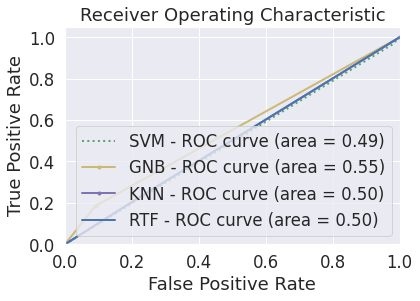

In [0]:
plt.figure()
lw = 2
plt.plot(fpr[1], tpr[1], 
         lw=lw, label='SVM - ROC curve (area = %0.2f)' % roc_auc[1], linestyle=':', color='g')

plt.plot(fpr[2], tpr[2], 
         lw=lw, label='GNB - ROC curve (area = %0.2f)' % roc_auc[2], marker='.',color='y')

plt.plot(fpr[3], tpr[3], 
         lw=lw, label='KNN - ROC curve (area = %0.2f)' % roc_auc[3], marker='.',color='m',)

plt.plot(fpr[3], tpr[3], 
         lw=lw, label='RTF - ROC curve (area = %0.2f)' % roc_auc[3], linestyle='-',color='b',)

#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='-')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

####**Feature Importance - BorutaPy**

In [0]:
# pip install Boruta

In [0]:
# from boruta import BorutaPy
 
# # load X and y
# X = X_train.values
# y = y_train.values
# y = y.ravel()
 
# # define random forest classifier, with utilising all cores and
# # sampling in proportion to y labels
# rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
 
# # define Boruta feature selection method
# feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=1)


# # find all relevant features
# feat_selector.fit(X, y)
 
# # check selected features
# feat_selector.support_
 
# # check ranking of features
# feat_selector.ranking_
 
# # call transform() on X to filter it down to selected features
# X_filtered = feat_selector.transform(X)

In [0]:
# # check number of variables 
# X_filtered.shape
# # get columns 
# features = X_train.columns 
# boruta_features = list()
# indexes = np.where(feat_selector.support_ == True)
# for x in np.nditer(indexes):
#     boruta_features.append(features[x])

# boruta_features